 This example showcases fitting and assessing Generalized Linear Models using the GENSELECT Procedure                                 
 The steps include:                                                   
                                                                      
1. PREPARE  
  a) Load data set into CAS                                        
<br>                                                                      
2. Perform Modeling on the Interval Target  
  a) Assuming normal distribution, using log link  
  b) Plot the prediction residuals                                    
<br>                                                                  
3. PERFORM Modeling on the Count Target  
  a) Fit a Generalized Linear Model  
  b) Identify high leverage observations from the training data    

### Import packages

In [1]:
from swat import *
import pandas as pd
import matplotlib.pyplot as plt
from swat.render import render_html
%matplotlib inline

### CAS Server connection details

In [2]:
cashost='localhost'
casport=5570
casauth='~/.authinfo'

### Start CAS session

In [3]:
sess = CAS(cashost, casport, authinfo=casauth, caslib="casuser")

### Details for local data to be loaded into CAS

In [4]:
indata_dir="/opt/sasinside/DemoData"
indata="bank"

### Import table action set

In [5]:
sess.loadactionset(actionset="table")
sess.loadactionset(actionset="sampling")
sess.loadactionset(actionset="regression")
sess.loadactionset(actionset="percentile")

NOTE: Added action set 'table'.
NOTE: Added action set 'sampling'.
NOTE: Added action set 'regression'.
NOTE: Added action set 'percentile'.


[actionset]

 'percentile'

+ Elapsed: 0.000197s, mem: 0.0287mb

### Load data into CAS

In [6]:
if not sess.table.tableExists(table=indata).exists:
    tbl = sess.upload_file(indata_dir+"/"+indata+".sas7bdat", casout={"name":indata})

NOTE: Cloud Analytic Services made the uploaded file available as table BANK in caslib CASUSER(viyauser).
NOTE: The table BANK has been created in caslib CASUSER(viyauser) from binary data uploaded to Cloud Analytic Services.


### Partition the data into training and validation 

In [7]:
sess.sampling.stratified(
  table={"name":"bank"},
  output={"casOut":{"name":"bank_part", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  partind=True
)

NOTE: Using SEED=525568792 for sampling.


[outputSize]

 {'outputNObs': 1060038.0, 'outputNVars': 55}

[STRAFreq]

 Frequencies
 
    ByGrpID     NObs   NSamp
 0        0  1060038  742027

[OutputCasTables]

               casLib       Name Label     Rows  Columns  \
 0  CASUSER(viyauser)  bank_part        1060038       55   
 
                                             casTable  
 0  CASTable('bank_part', caslib='CASUSER(viyauser)')  

+ Elapsed: 0.807s, user: 2.14s, sys: 0.73s, mem: 53.3mb

### The Interval target model

In [8]:
gm = sess.regression.genmod(
  table={"name":"bank_part"},
  classVars=[{"vars":{"cat_input1", "cat_input2"}}],
  model={
    "depvars":[{"name": "int_tgt"}],
    "effects":[{"vars":{"cat_input1", "cat_input2", "logi_rfm1", "logi_rfm2", "logi_rfm3", "logi_rfm4",
                       "logi_rfm5", "logi_rfm6", "logi_rfm7", "logi_rfm8", "logi_rfm9", "logi_rfm10", 
                        "logi_rfm11", "logi_rfm12"}}],
    "dist":"NEGBIN",
    "link":"LOG"
  },
  selection={"method":"FORWARD", "choose":"SBC", "select":"SBC", "stop":"SBC"},
  partByVar={"name":"_partind_", "train":"1", "validate":"0"},
  output={
    "casOut":{"name":"_scored_glm", "replace":True}, 
    "copyVars":"ALL",
    "resRaw": "Residual",
    "pred":"Prediction",
    "h" : "Leverage"
  }
)

# Output model statistics
render_html(gm)


NOTE: Convergence criterion (GCONV=1E-8) satisfied.


Model Information 
 RowId 
 Description 
 Value 
 
 
 DATA Data Source BANK_PART 
 RESPONSEVAR Response Variable int_tgt 
 DIST Distribution Negative Binomial 
 LINK Link Function Log 
 TECH Optimization Technique Newton-Raphson with Ridging 
 
 
 
 
 Number of Observations 
 RowId 
 Description 
 Total 
 Training 
 Validation 
 
 
 NREAD Number of Observations Read 1060038 742027 318011 
 NUSED Number of Observations Used 211509 147882 63627 
 
 
 
 
 Class Level Information 
 Class 
 Levels 
 Values 
 
 
 cat_input2 5 A B C D E 
 cat_input1 3 X Y Z 
 
 
 
 
 Selection Information 
 Description 
 Value 
 Numeric Value 
 
 
 Selection Method Forward nan 
 Select Criterion SBC nan 
 Choose Criterion SBC nan 
 Stop Criterion SBC nan 
 Effect Hierarchy Enforced None nan 
 Stop Horizon 3 3 
 
 
 
 
 Convergence Status 
 Reason 
 Status 
 Max Gradient 
 
 
 Convergence criterion (GCONV=1E-8) satisfied. 0 2.1453179E-7 
 
 
 
 
 Selection Summary 
 Control 
 Step 
 Effect Entered 
 Number Of Effects 
 SBC 
 Optimal SBC 
 
 
 0 Intercept 1 3044231.5081 0 
 - 1 logi_rfm1 2 3035532.278 1 
 2 logi_rfm5 3 3036846.8525 0 
 3 logi_rfm2 4 3036525.0767 0 
 4 logi_rfm9 5 3036310.608 0 
 
 
 
 
 Stop Reason 
 Reason 
 Code 
 
 
 Selection stopped at a local minimum of the SBC criterion. 6 
 
 
 
 
 Selection Reason 
 Reason 
 
 
 The model at step 1 is selected where SBC is 3035532. 
 
 
 
 
 Selected Effects 
 Label 
 Effects 
 
 
 Selected Effects: Intercept logi_rfm1 
 
 
 
 
 Dimensions 
 RowId 
 Description 
 Value 
 
 
 NDESIGNCOLS Columns in Design 2 
 NEFFECTS Number of Effects 2 
 MAXEFCOLS Max Effect Columns 1 
 DESIGNRANK Rank of Design 2 
 OPTPARM Parameters in Optimization 3 
 
 
 
 
 Fit Statistics 
 RowId 
 Description 
 Training 
 Validation 
 
 
 M2LL -2 Log Likelihood 3037411.0028 1306963.7377 
 AIC AIC (smaller is better) 3037417.0028 1306969.7377 
 AICC AICC (smaller is better) 3037417.0029 1306969.738 
 SBC SBC (smaller is better) 3037446.7153 1306996.92 
 ASE Average Square Error 63181420.168 71444129.374 
 
 
 
 
 Parameter Estimates 
 Effect 
 Parameter 
 Parameter 
 DF 
 Estimate 
 Standard Error 
 Chi-Square 
 Pr > ChiSq 
 
 
 Intercept Intercept Intercept 1 8.543925641 0.0096473096 784336.61733 0 
 logi_rfm1 logi_rfm1 logi_rfm1 1 0.3227767548 0.0039571401 6653.3695455 0 
 Dispersion Dispersion Dispersion 1 0.6669300048 0.0023078897 nan nan 
 
 
 
 
 Task Timing 
 RowId 
 Task 
 Time 
 Relative Time 
 
 
 SETUP Setup and Parsing 0.0031518936 0.0008529136 
 LEVELIZATION Levelization 0.2997419834 0.0811112471 
 INITIALIZATION Model Initialization 0.0004079342 0.0001103884 
 SSCP SSCP Computation 0.2150390148 0.0581903224 
 FITTING Model Selection 2.2384688854 0.6057376442 
 OUTPUT Creating Output Data 0.9348621368 0.2529770202 
 CLEANUP Cleanup 0.0015079975 0.0004080695 
 TOTAL Total 3.695442915 1 
 
 
 
 
 Output CAS Tables 
 CAS Library 
 Name 
 Label 
 Number of Rows 
 Number of Columns 
 Table 
 
 
 CASUSER(viyauser) _scored_glm 1060038 58 CASTable('_scored_glm', caslib='CASUSER(viyauser)')

In [9]:
df = sess.CASTable("_scored_glm")

In [10]:
df = df[df._PartInd_ == 0][df.Residual.notnull()].to_frame()

In [11]:
df.head()

,Prediction,Residual,Leverage,b_tgt,cat_input1,cat_input2,cnt_tgt,demog_age,demog_ho,demog_homeval,...,rfm9,rfm10,rfm11,rfm12,ri_demog_homeval,ri_demog_inc,demog_genf,demog_genm,account,_PartInd_
0,12106.103351,-5106.103351,0.000009,1.0,X,B,1.0,NaN,0.0,168974.0,...,24.0,12.0,6.0,53.0,168974.0,40368.693705,1.0,0.0,100297798,0.0
1,10656.978279,-6656.978279,0.000007,1.0,X,B,2.0,NaN,1.0,104325.0,...,24.0,11.0,6.0,53.0,104325.0,46726.000000,0.0,1.0,100297799,0.0
2,9624.047604,-7624.047604,0.000011,1.0,X,B,3.0,72.0,1.0,81228.0,...,18.0,12.0,6.0,54.0,81228.0,52148.000000,1.0,0.0,100297816,0.0
3,11350.250008,-5350.250008,0.000007,1.0,X,B,1.0,51.0,0.0,81183.0,...,16.0,11.0,5.0,104.0,81183.0,52148.000000,0.0,1.0,100297819,0.0
4,14227.500018,10772.499982,0.000021,1.0,X,B,1.0,56.0,1.0,93602.0,...,17.0,13.0,6.0,72.0,93602.0,46777.000000,1.0,0.0,100297822,0.0


In [12]:
df.columns

Index(['Prediction', 'Residual', 'Leverage', 'b_tgt', 'cat_input1',
       'cat_input2', 'cnt_tgt', 'demog_age', 'demog_ho', 'demog_homeval',
       'demog_inc', 'demog_pr', 'i_demog_age', 'i_rfm1', 'i_rfm2', 'i_rfm3',
       'i_rfm4', 'i_rfm5', 'i_rfm6', 'i_rfm7', 'i_rfm8', 'i_rfm9', 'i_rfm10',
       'i_rfm11', 'i_rfm12', 'int_tgt', 'logi_rfm1', 'logi_rfm2', 'logi_rfm3',
       'logi_rfm4', 'logi_rfm5', 'logi_rfm6', 'logi_rfm7', 'logi_rfm8',
       'logi_rfm9', 'logi_rfm10', 'logi_rfm11', 'logi_rfm12',
       'r_demog_homeval', 'r_demog_inc', 'rfm1', 'rfm2', 'rfm3', 'rfm4',
       'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12',
       'ri_demog_homeval', 'ri_demog_inc', 'demog_genf', 'demog_genm',
       'account', '_PartInd_'],
      dtype='object')

In [13]:
df.shape

(63627, 58)

#### Plot the residuals from the validation partition of the data

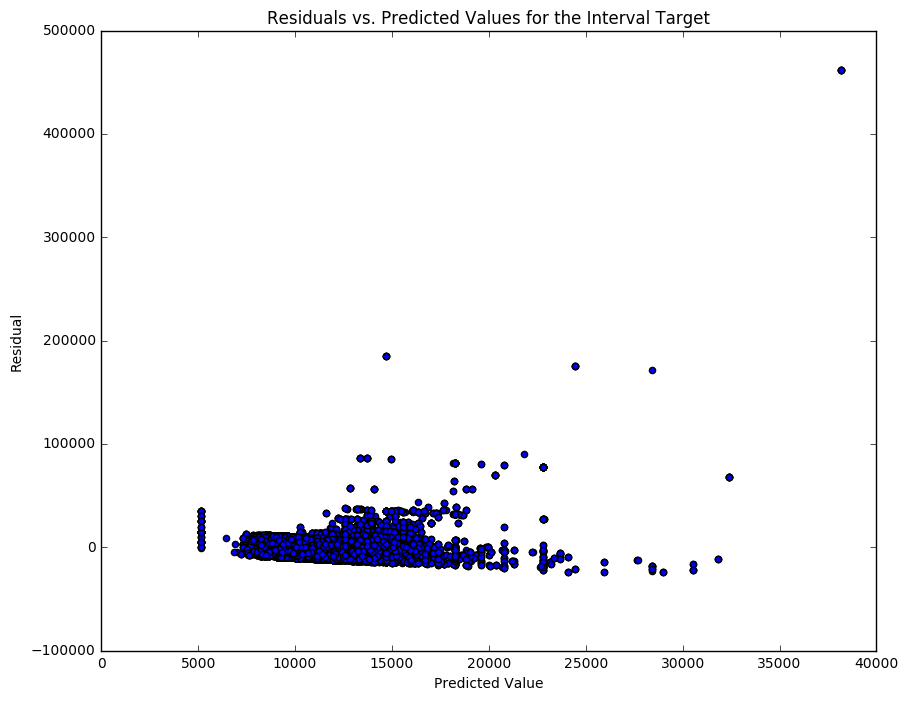

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(df.Prediction, df.Residual, c='b')
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Residuals vs. Predicted Values for the Interval Target");

### Partition the data into training and validation for the Count Target

In [15]:
sess.sampling.stratified(
  table={"name":"bank", "groupBy" : "cnt_tgt" },
  output={"casOut":{"name":"bank_part_cnt", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  partind=True
)

NOTE: Using SEED=533265194 for sampling.


[outputSize]

 {'outputNObs': 1060038.0, 'outputNVars': 55}

[STRAFreq]

 Frequencies
 
    ByGrpID       cnt_tgt    NObs   NSamp
 0        0             .       1       1
 1        1             0  848529  593970
 2        2             1  115819   81073
 3        3             2   75592   52914
 4        4             3   17237   12066
 5        5             4    2552    1786
 6        6             5     297     208
 7        7             6      11       8

[OutputCasTables]

               casLib           Name Label     Rows  Columns  \
 0  CASUSER(viyauser)  bank_part_cnt        1060038       55   
 
                                             casTable  
 0  CASTable('bank_part_cnt', caslib='CASUSER(viya...  

+ Elapsed: 0.748s, user: 2.58s, sys: 0.759s, mem: 47.8mb

### The Count Target model

In [16]:
gm_cnt = sess.regression.genmod(
  table={"name":"bank_part_cnt"},
  classVars=[{"vars":{"cat_input1", "cat_input2"}}],
  model={
    "depvars":[{"name": "cnt_tgt"}],
    "effects":[{"vars":{"cat_input1", "cat_input2", "logi_rfm1", "logi_rfm2", "logi_rfm3", "logi_rfm4",
                       "logi_rfm5", "logi_rfm6", "logi_rfm7", "logi_rfm8", "logi_rfm9", "logi_rfm10", 
                        "logi_rfm11", "logi_rfm12"}}],
    "dist":"NEGBIN",
    "link":"LOG"
  },
  selection={"method":"BACKWARD", "choose":"SBC", "select":"SBC", "stop":"SBC"},
  partByVar={"name":"_partind_", "train":"1", "validate":"0"},
  output={
    "casOut":{"name":"_scored_glm_cnt", "replace":True}, 
    "copyVars":"ALL",
    "resRaw": "Residual",
    "pred":"Prediction",
    "h" : "Leverage",
    "difchisq" : "_difchisquare_"
  }
)

# Output model statistics
render_html(gm_cnt)

NOTE: Convergence criterion (GCONV=1E-8) satisfied.


Model Information 
 RowId 
 Description 
 Value 
 
 
 DATA Data Source BANK_PART_CNT 
 RESPONSEVAR Response Variable cnt_tgt 
 DIST Distribution Negative Binomial 
 LINK Link Function Log 
 TECH Optimization Technique Newton-Raphson with Ridging 
 
 
 
 
 Number of Observations 
 RowId 
 Description 
 Total 
 Training 
 Validation 
 
 
 NREAD Number of Observations Read 1060038 742026 318012 
 NUSED Number of Observations Used 1060037 742025 318012 
 
 
 
 
 Class Level Information 
 Class 
 Levels 
 Values 
 
 
 cat_input2 5 A B C D E 
 cat_input1 3 X Y Z 
 
 
 
 
 Selection Information 
 Description 
 Value 
 Numeric Value 
 
 
 Selection Method Backward nan 
 Select Criterion SBC nan 
 Choose Criterion SBC nan 
 Stop Criterion SBC nan 
 Effect Hierarchy Enforced Single nan 
 Stop Horizon 3 3 
 
 
 
 
 Convergence Status 
 Reason 
 Status 
 Max Gradient 
 
 
 Convergence criterion (GCONV=1E-8) satisfied. 0 3.299737E-11 
 
 
 
 
 Selection Summary 
 Control 
 Step 
 Effect Removed 
 Number Of Effects 
 SBC 
 Optimal SBC 
 
 
 0 15 813381.41557 0 
 - 1 logi_rfm12 14 813372.06622 0 
 2 logi_rfm4 13 813366.02985 0 
 3 logi_rfm10 12 813362.05811 0 
 4 logi_rfm8 11 813361.27661 1 
 5 logi_rfm6 10 813373.95286 0 
 6 logi_rfm3 9 813409.48347 0 
 7 logi_rfm7 8 813585.06117 0 
 
 
 
 
 Stop Reason 
 Reason 
 Code 
 
 
 Selection stopped at a local minimum of the SBC criterion. 6 
 
 
 
 
 Selection Reason 
 Reason 
 
 
 The model at step 4 is selected where SBC is 813361.3. 
 
 
 
 
 Selected Effects 
 Label 
 Effects 
 
 
 Selected Effects: Intercept logi_rfm3 logi_rfm5 cat_input1 logi_rfm2 logi_rfm7 logi_rfm11 logi_rfm9 cat_input2 logi_rfm6 logi_rfm1 
 
 
 
 
 Dimensions 
 RowId 
 Description 
 Value 
 
 
 NDESIGNCOLS Columns in Design 17 
 NEFFECTS Number of Effects 11 
 MAXEFCOLS Max Effect Columns 5 
 DESIGNRANK Rank of Design 15 
 OPTPARM Parameters in Optimization 16 
 
 
 
 
 Fit Statistics 
 RowId 
 Description 
 Training 
 Validation 
 
 
 M2LL -2 Log Likelihood 813144.88792 348108.64097 
 AIC AIC (smaller is better) 813176.88792 348140.64097 
 AICC AICC (smaller is better) 813176.88865 348140.64269 
 SBC SBC (smaller is better) 813361.16213 348311.35848 
 ASE Average Square Error 0.3741333235 0.3694820618 
 
 
 
 
 Parameter Estimates 
 Effect 
 cat_input1 
 cat_input2 
 Parameter 
 Parameter 
 DF 
 Estimate 
 Standard Error 
 Chi-Square 
 Pr > ChiSq 
 
 
 Intercept Intercept Intercept 1 1.9118583701 0.0381115928 2516.5017389 0 
 logi_rfm3 logi_rfm3 logi_rfm3 1 -0.070103231 0.0117387484 35.664199478 2.3443286E-9 
 logi_rfm5 logi_rfm5 logi_rfm5 1 1.7981820863 0.0100773026 31840.416313 0 
 cat_input1 X cat_input1 X cat_input1_X 1 0.1969156127 0.0126959068 240.56522602 2.961158E-54 
 cat_input1 Y cat_input1 Y cat_input1_Y 1 0.2280985101 0.0151791322 225.8140751 4.878191E-51 
 cat_input1 Z cat_input1 Z cat_input1_Z 0 0 nan nan nan 
 logi_rfm2 logi_rfm2 logi_rfm2 1 -0.83031182 0.0136786883 3684.6270288 0 
 logi_rfm7 logi_rfm7 logi_rfm7 1 -0.094430094 0.0068296683 191.17082792 1.765097E-43 
 logi_rfm11 logi_rfm11 logi_rfm11 1 -0.319269051 0.0112593495 804.05737661 7.07811E-177 
 logi_rfm9 logi_rfm9 logi_rfm9 1 -1.094391794 0.0072835231 22576.813698 0 
 cat_input2 A cat_input2 A cat_input2_A 1 0.71007723 0.0063596092 12466.665612 0 
 cat_input2 B cat_input2 B cat_input2_B 1 0.4641641087 0.0064599888 5162.7320787 0 
 cat_input2 C cat_input2 C cat_input2_C 1 0.2417520053 0.0068782303 1235.340689 1.27313E-270 
 cat_input2 D cat_input2 D cat_input2_D 1 0.1943711117 0.007964603 595.57323203 1.53696E-131 
 cat_input2 E cat_input2 E cat_input2_E 0 0 nan nan nan 
 logi_rfm6 logi_rfm6 logi_rfm6 1 -0.023422077 0.0045828537 26.120340726 3.2078681E-7 
 logi_rfm1 logi_rfm1 logi_rfm1 1 -0.097410234 0.0132320794 54.194221425 1.816202E-13 
 Dispersion Dispersion Dispersion 1 0.1538338256 0.0042554209 nan nan 
 
 
 
 
 Task Timing 
 RowId 
 Task 
 Time 
 Relative Time 
 
 
 SETUP Setup and Parsing 0.0029520988 0.0002271621 
 LEVELIZATION Levelizat

In [17]:
df_cnt = sess.CASTable("_scored_glm_cnt")

In [18]:
df_cnt = df_cnt[df_cnt._PartInd_ == 1][df_cnt._difchisquare_ > 100].to_frame()

In [19]:
df_cnt.columns

Index(['Prediction', 'Residual', 'Leverage', '_difchisquare_', 'b_tgt',
       'cat_input1', 'cat_input2', 'cnt_tgt', 'demog_age', 'demog_ho',
       'demog_homeval', 'demog_inc', 'demog_pr', 'i_demog_age', 'i_rfm1',
       'i_rfm2', 'i_rfm3', 'i_rfm4', 'i_rfm5', 'i_rfm6', 'i_rfm7', 'i_rfm8',
       'i_rfm9', 'i_rfm10', 'i_rfm11', 'i_rfm12', 'int_tgt', 'logi_rfm1',
       'logi_rfm2', 'logi_rfm3', 'logi_rfm4', 'logi_rfm5', 'logi_rfm6',
       'logi_rfm7', 'logi_rfm8', 'logi_rfm9', 'logi_rfm10', 'logi_rfm11',
       'logi_rfm12', 'r_demog_homeval', 'r_demog_inc', 'rfm1', 'rfm2', 'rfm3',
       'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11',
       'rfm12', 'ri_demog_homeval', 'ri_demog_inc', 'demog_genf', 'demog_genm',
       'account', '_PartInd_'],
      dtype='object')

In [20]:
df_cnt.shape

(160, 59)

#### Top high leverage observations from Training data

In [21]:
df_cnt[['account', '_difchisquare_']].sort_values(['_difchisquare_'], ascending=False)

,account,_difchisquare_
82,100303380,604.389404
24,100101600,416.876587
155,100968903,409.744435
140,100622121,372.414796
143,100765471,253.377893
138,100187269,253.377893
68,100108919,241.614341
123,100494387,241.614341
79,100278932,241.604937
115,100603093,224.210751


### End CAS session

In [22]:
sess.close()